# **import essential libraries**

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as shc 
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

Advantages

• Easy to implement

• With a large number of variables, K-­‐Means may be computaHonally faster than hierarchical clustering (if K is small).

• k-­‐Means may produce Hghter clusters than hierarchical clustering

• An instance can change cluster (move to another cluster) when the centroids are re-­‐ computed.

Disavantages • Difficult to predict the number of clusters (K-­‐Value)

• IniHal seeds have a strong impact on the final results

• The order of the data has an impact on the final results

• SensiHve to scale: rescaling your datasets (normalizaHon or standardizaHon) will completely change results. While this itself is not bad, not realizing that you have to spend extra a4en(on to scaling your data might be bad.



# **Importing dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/lung_cancer.csv')

#**Data Preprocessing**
**converting catogorical data to numerical data**

In [ ]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
def findUnique(col):
  print("The number of unique values are "+ str(df[col].nunique()))
  print("The unique values are :")
  print( df[col].unique())

In [5]:
findUnique("Name")

The number of unique values are 49
The unique values are :
['John' 'Camela' 'Alex' 'Diego' 'Cristiano' 'Mihail' 'Kathy' 'Nicole'
 'Ray' 'Fredric' 'Yul' 'Joan' 'Jane' 'Anna' 'Katharine ' 'Barbra'
 'Maggie ' 'Glenda ' 'Jane ' 'Maximilian ' 'Gregory ' 'Sidney ' 'Rex '
 'Lee ' 'Paul ' 'Rod ' 'John ' 'Gene ' 'Marlon ' 'Jack ' 'Peter '
 'Richard ' 'Dustin ' 'Henry ' 'Robert ' 'Ellen ' 'Faye ' 'Diane '
 'Sally ' 'Sissy ' 'Jessica ' 'Gwyneth ' 'Halle ' 'Nicole ' 'Charlize '
 'Barbra ' 'Ernest ' 'Alec ' 'Charlton ']


In [6]:
findUnique("Surname")

The number of unique values are 49
The unique values are :
['Wick' 'Constantine' 'Anderson' 'Telles' 'Maradona' 'Ronaldo' 'Tal'
 'Bates' 'Kidman' 'Milland' 'March' 'Brynner' 'Crawford' 'Wyman' 'Magnani'
 'Hepburn' 'Streisand' 'Smith' 'Jackson' 'Fonda' 'Schell' 'Peck' 'Poitier'
 'Harrison' 'Marvin' 'Scofield' 'Steiger' 'Wayne' 'Hackman' 'Brando'
 'Lemmon' 'Nicholson' 'Finch ' 'Dreyfuss' 'Hoffman' 'Henry ' 'Duvall'
 'Burstyn' 'Dunaway' 'Keaton' 'Field' 'Spacek' 'Lange' 'Paltrow' 'Berry'
 'Theron' 'Borgnine' 'Guinness' 'Heston']


In [11]:
df['Name'].replace(['John' ,'Camela', 'Alex', 'Diego', 'Cristiano' ,'Mihail', 'Kathy', 'Nicole','Ray' ,'Fredric', 'Yul', 'Joan', 'Jane', 'Anna', 'Katharine ', 'Barbra',
 'Maggie ' ,'Glenda ' ,'Jane ', 'Maximilian ' ,'Gregory ', 'Sidney ' ,'Rex ','Lee ', 'Paul ', 'Rod ', 'John ', 'Gene ' ,'Marlon ', 'Jack ', 'Peter ','Richard ', 'Dustin ', 'Henry ', 'Robert ', 'Ellen ', 'Faye ', 'Diane ',
 'Sally ', 'Sissy ', 'Jessica ', 'Gwyneth ', 'Halle ', 'Nicole ', 'Charlize ','Barbra ' ,'Ernest ', 'Alec ', 'Charlton '],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48],inplace=True)
df['Surname'].replace(['Wick', 'Constantine', 'Anderson', 'Telles', 'Maradona' ,'Ronaldo' ,'Tal',
 'Bates', 'Kidman', 'Milland' ,'March' ,'Brynner', 'Crawford', 'Wyman' ,'Magnani',
 'Hepburn', 'Streisand', 'Smith' ,'Jackson', 'Fonda', 'Schell', 'Peck', 'Poitier',
 'Harrison', 'Marvin', 'Scofield', 'Steiger', 'Wayne', 'Hackman', 'Brando',
 'Lemmon', 'Nicholson', 'Finch ', 'Dreyfuss', 'Hoffman', 'Henry ', 'Duvall',
 'Burstyn', 'Dunaway', 'Keaton' ,'Field' ,'Spacek', 'Lange', 'Paltrow' ,'Berry',
 'Theron', 'Borgnine' ,'Guinness', 'Heston'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48], inplace=True)
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,0,0,35,3,5,4,1
1,0,1,27,20,2,5,1
2,1,2,30,0,5,2,0
3,2,3,28,0,8,1,0
4,3,4,68,4,5,6,1


In [12]:
# to check if all the columns are convereted to the numerical data
df._get_numeric_data().count()

Name       59
Surname    59
Age        59
Smokes     59
AreaQ      59
Alkhol     59
Result     59
dtype: int64

**drop empty and nan data**

In [13]:
df.dropna()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,0,0,35,3,5,4,1
1,0,1,27,20,2,5,1
2,1,2,30,0,5,2,0
3,2,3,28,0,8,1,0
4,3,4,68,4,5,6,1
5,4,5,34,0,10,0,0
6,5,6,58,15,10,0,0
7,6,7,22,12,5,2,0
8,7,8,45,2,6,0,0
9,8,9,52,18,4,5,1


**Droping unwanted column**

In [14]:
df.drop(['Name'], axis=1, inplace=True)
df.drop("Surname", axis=1, inplace=True)
df.head()


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


#**Normalise the dataset**

**Use standard scaler to normalise the dataset**

In [15]:
X_copy = df.copy() 
scaler = StandardScaler()
X_columns = df.columns
normalised = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
normalised.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,-0.473821,-1.524356,-0.083321,0.323148,1.052209
1,-0.970806,0.623016,-1.312310,0.746830,1.052209
2,-0.784437,-1.903304,-0.083321,-0.524218,-0.950382
3,-0.908683,-1.903304,1.145668,-0.947900,-0.950382
4,1.576244,-1.398040,-0.083321,1.170513,1.052209


#**Hierarchical Clustering**

In [17]:
x = df.iloc[:, [1,4]].values  
x

array([[ 3,  1],
       [20,  1],
       [ 0,  0],
       [ 0,  0],
       [ 4,  1],
       [ 0,  0],
       [15,  0],
       [12,  0],
       [ 2,  0],
       [18,  1],
       [ 4,  0],
       [10,  0],
       [ 2,  0],
       [20,  1],
       [25,  1],
       [18,  0],
       [22,  1],
       [12,  0],
       [ 5,  1],
       [10,  1],
       [15,  1],
       [ 8,  0],
       [20,  0],
       [ 5,  0],
       [ 3,  1],
       [20,  0],
       [15,  0],
       [12,  0],
       [20,  1],
       [20,  1],
       [13,  0],
       [20,  1],
       [15,  1],
       [25,  1],
       [10,  0],
       [20,  0],
       [20,  1],
       [15,  1],
       [25,  0],
       [10,  0],
       [20,  1],
       [12,  0],
       [20,  1],
       [20,  1],
       [15,  0],
       [20,  0],
       [20,  0],
       [10,  0],
       [20,  1],
       [20,  1],
       [12,  0],
       [30,  1],
       [34,  1],
       [20,  0],
       [13,  0],
       [20,  1],
       [15,  1],
       [30,  1],
       [25,  0

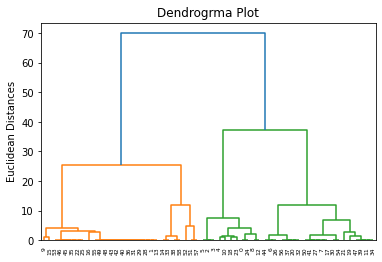

In [18]:
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  

mtp.show()  

In [19]:
from sklearn.cluster import AgglomerativeClustering  

#**training the hierarchical model on dataset**

In [20]:
#visulaizing the clusters 
def clusters(col1, col2):
  x = df.iloc[:, [col1, col2]].values  
  hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
  y_pred= hc.fit_predict(x)  
  #y_pred
  mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
  mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
  mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
  mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
  mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
  mtp.title('clusters of '+df.columns[col1]+' and '+df.columns[col2])  
  mtp.xlabel(df.columns[col1])  
  mtp.ylabel(df.columns[col2])  
  mtp.legend()  
  mtp.show()  

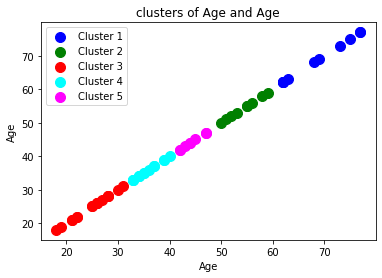

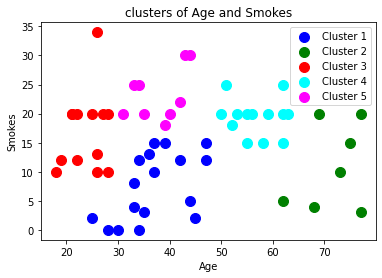

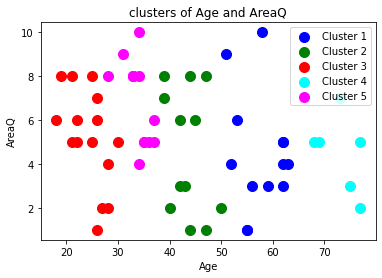

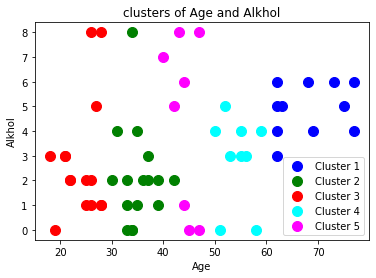

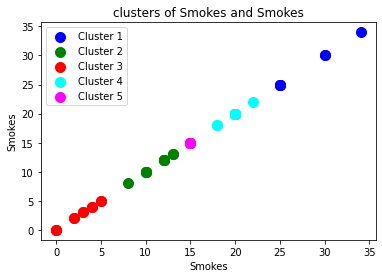

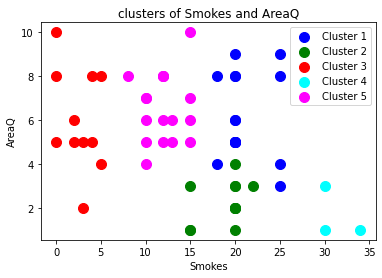

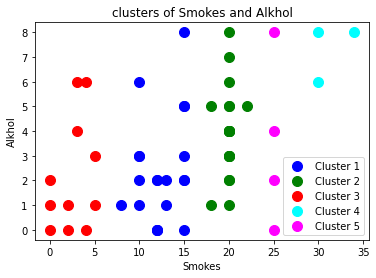

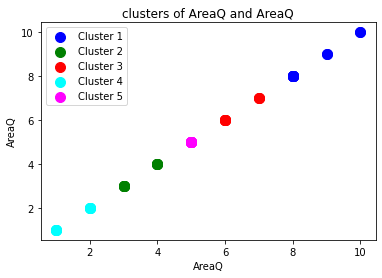

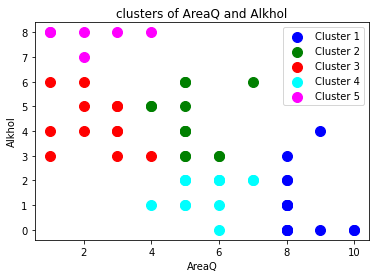

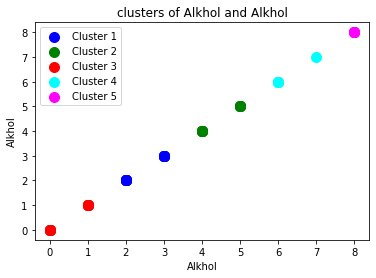

In [21]:
for i in range(len(df.columns)-1):
  for j in range(i, len(df.columns)-1):
    clusters(i, j)
    print("\n\n")